# Libraries

In [1]:
import numpy as np
import random
import os
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Load and data pre-processing

In [4]:
P1_left_img_dir = "datastet/MMU-Iris-Database/1/left/"
P1_left_mask_dir = "mask dataset/1/left/"

P1_left = [P1_left_img_dir+"{}".format(i) for i in os.listdir(P1_left_img_dir) if 'bmp' in i]
P1_mask_left = [P1_left_mask_dir+"{}".format(i) for i in os.listdir(P1_left_mask_dir) if 'bmp' in i]

P1_right_img_dir = "datastet/MMU-Iris-Database/1/right/"
P1_right_mask_dir = "mask dataset/1/right/"

P1_right = [P1_right_img_dir+"{}".format(i) for i in os.listdir(P1_right_img_dir) if 'bmp' in i]
P1_mask_right = [P1_right_mask_dir+"{}".format(i) for i in os.listdir(P1_right_mask_dir) if 'bmp' in i]



In [5]:
np.sort(P1_mask_left)

array(['mask dataset/1/left/1.bmp', 'mask dataset/1/left/2.bmp',
       'mask dataset/1/left/3.bmp', 'mask dataset/1/left/4.bmp',
       'mask dataset/1/left/5.bmp'], dtype='<U25')

In [4]:
# eye data image
img_left_train, img_left_test = [], []
img_right_train, img_right_test = [], []
# left
for P1_left_path in np.sort(P1_left):
    img_left = imread(P1_left_path,as_gray=True)
    # resized_img = transform.resize(img,(224,224))
    normalized_img_left = img_left/255.0
    print('the size of this image is', normalized_img_left.shape)
    if '5' in P1_left_path:
        img_left_test.append(normalized_img_left)
    else:
        img_left_train.append(normalized_img_left)
# right
for P1_right_path in np.sort(P1_right):
    img_right = imread(P1_right_path,as_gray=True)
    # resized_img = transform.resize(img,(224,224))
    normalized_img_right = img_right/255.0
    print('the size of this image is', normalized_img_left.shape)
    if '5' in P1_right_path:
        img_right_test.append(normalized_img_right)
    else:
        img_right_train.append(normalized_img_right)

# mask
mask_left_train, mask_left_test = [], []
mask_right_train, mask_right_test = [], []
# mask left
for P1_mask_left_path in np.sort(P1_mask_left):
    img_mask_left = imread(P1_mask_left_path,as_gray=True)
    # resized_img = transform.resize(img,(224,224))
    normalized_img_mask_left = img_mask_left/255.0
    print('the size of this image is', normalized_img_left.shape)
    if '5' in P1_mask_left_path:
        mask_left_test.append(normalized_img_mask_left)
    else:
        mask_left_train.append(normalized_img_mask_left)
# mask right
for P1_mask_right_path in np.sort(P1_mask_right):
    img_mask_right = imread(P1_mask_right_path,as_gray=True)
    # resized_img = transform.resize(img,(224,224))
    normalized_img_mask_right = img_mask_right/255.0
    print('the size of this image is', normalized_img_left.shape)
    if '5' in P1_mask_right_path:
        mask_right_train.append(normalized_img_mask_right)
    else:
        mask_right_test.append(normalized_img_mask_right)

the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)
the size of this image is (240, 320)


# Training model

In [5]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *

In [6]:
kernel_initializer =  'he_uniform'  
inputs = Input((240, 320, 1))
s = inputs

#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

#Expansive path 
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 320, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 240, 320, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [7]:
model.compile(optimizer=Adam(lr=0.0001), loss=['categorical_crossentropy'], metrics=['accuracy'])

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [9]:
model.fit(x=np.array(img_left_train),y=np.array(mask_left_train),
          epochs=30,
         callbacks=[callback])

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.5881 - accuracy: 0.0402
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 0.5881 - accuracy: 0.0425
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 0.5881 - accuracy: 0.0420
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.5881 - accuracy: 0.0402
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.5881 - accuracy: 0.0384
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.5881 - accuracy: 0.0373
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.5880 - accuracy: 0.0356
Epoch 8/30
1/1 [==============================] - 2s 2s/step - loss: 0.5880 - accuracy: 0.0343
Epoch 9/30
1/1 [==============================] - 2s 2s/step - loss: 0.5880 - accuracy: 0.0330
Epoch 10/30
1/1 [==============================] - 2s 2s/step - loss: 0.5880 - accuracy: 0.0314
Epoch 11/30
1/1 [==============================] 

# Predict and visualize

In [10]:
# Predictions
predicted_mask_left_test = model.predict(np.array(img_left_test))

1/1 [==============================] - 0s 438ms/step


In [11]:
predicted_mask_left_test[0].shape

(240, 320, 1)

In [12]:
img_left_test[0].shape

(240, 320)

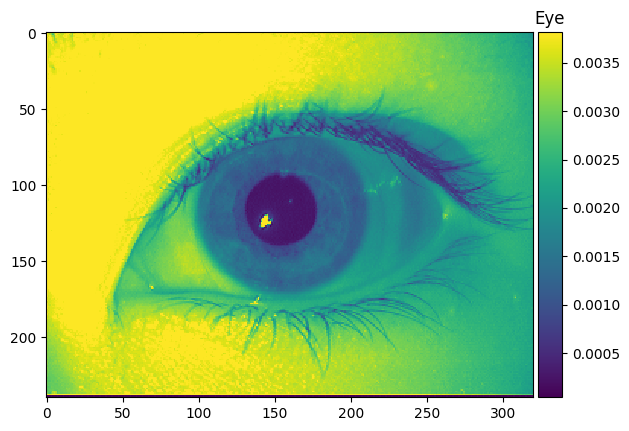

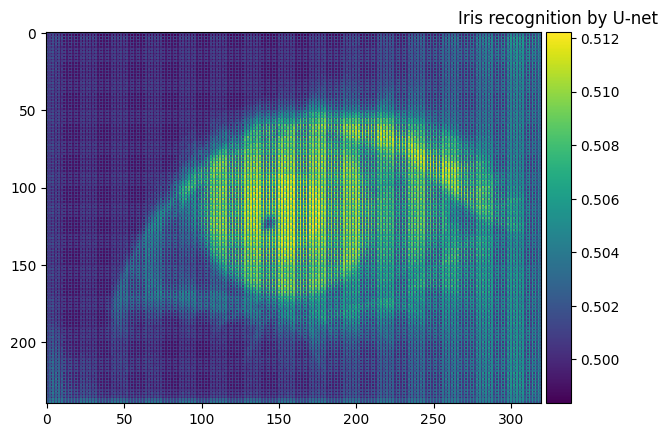

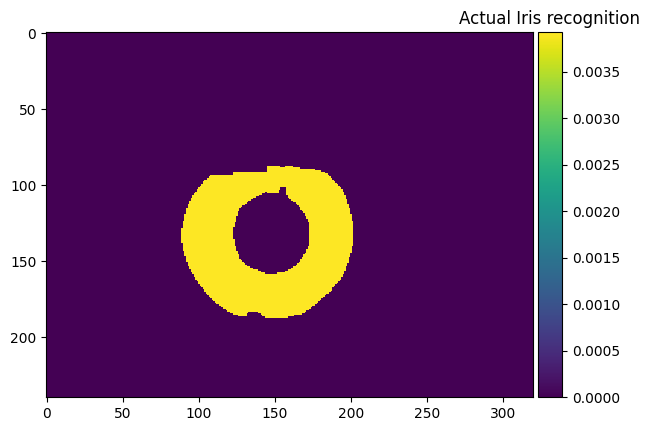

In [13]:
imshow(img_left_test[0])
plt.title("Eye")
plt.show()
imshow(predicted_mask_left_test[0])
plt.title("Iris recognition by U-net")
plt.show()
imshow(mask_left_test[0])
plt.title("Actual Iris recognition")
plt.show()